# FB Prophet
Learn how to make time series forecasts on daily wikipedia page views using [FB Prophet](https://facebook.github.io/prophet/docs/quick_start.html) 

The dataset and code are taken from the <a href="https://github.com/facebook/prophet/blob/master/notebooks/quick_start.ipynb">quick-start example notebook </a> in the <a href="https://github.com/facebook/prophet">prophet repo</a>.

## Step One:
Import Dependencies

In [1]:
import pandas as pd
import time
from datetime import datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Step Two:  Convert data to a DataFrame 

Convert data from one of the following sources:

- InfluxDB 

- CSV


### To convert from InfluxDB
Use the Python InfluxDB Client to query data and return it as a Panda DataFrame. For more information, [Getting Started with InfluxDB and Pandas](../Getting_Started_with_InfluxDB_and_Pandas.ipynb). Then continue to Step 3.

### To convert from CSV
Run the following code to convert csv data to a Panda DataFrame:

In [2]:
df = pd.read_csv("./sample_data/Prophet.csv") 
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


###  To visualize the data 
Run the following code to visualize the data:

<AxesSubplot:>

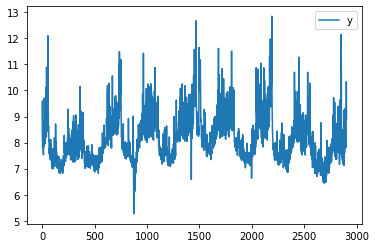

In [3]:
df.plot()

## Step Three: Apply Prophet

We fit the model by instantiating a new `Prophet` object.  Any settings to the forecasting procedure are passed into the constructor.  Then you call its `fit` method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well. 

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The `predict` method will assign each row in `future` a predicted value which it names `yhat`.  If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206497,7.499215,8.904971
3266,2017-01-16,8.531523,7.753713,9.246854
3267,2017-01-17,8.318930,7.542319,9.053389
3268,2017-01-18,8.151543,7.418053,8.903991
3269,2017-01-19,8.163477,7.443914,8.893829


In [7]:
forecast['measurement'] = "views"
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper','measurement']].head()

,ds,yhat,yhat_lower,yhat_upper,measurement
0,2007-12-10,8.844170,8.192078,9.449456,views
1,2007-12-11,8.592697,8.019102,9.232706,views
2,2007-12-12,8.388514,7.768730,9.024291,views
3,2007-12-13,8.366423,7.734438,8.962019,views
4,2007-12-14,8.354384,7.730717,8.960521,views


You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.Upper and lower confidence intervals are included. 

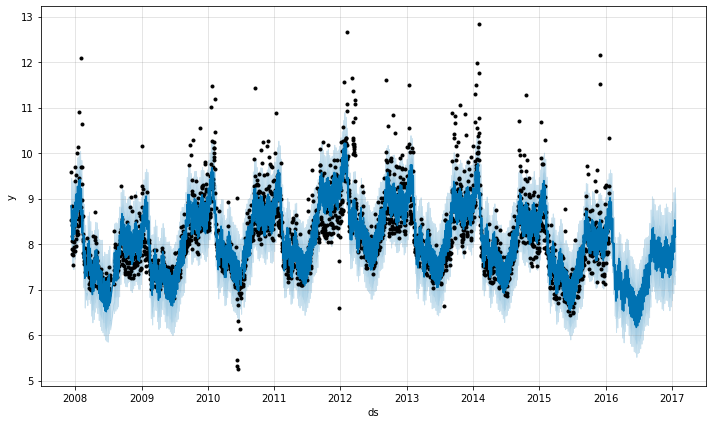

In [8]:
fig1 = m.plot(forecast)